8
8
8
8


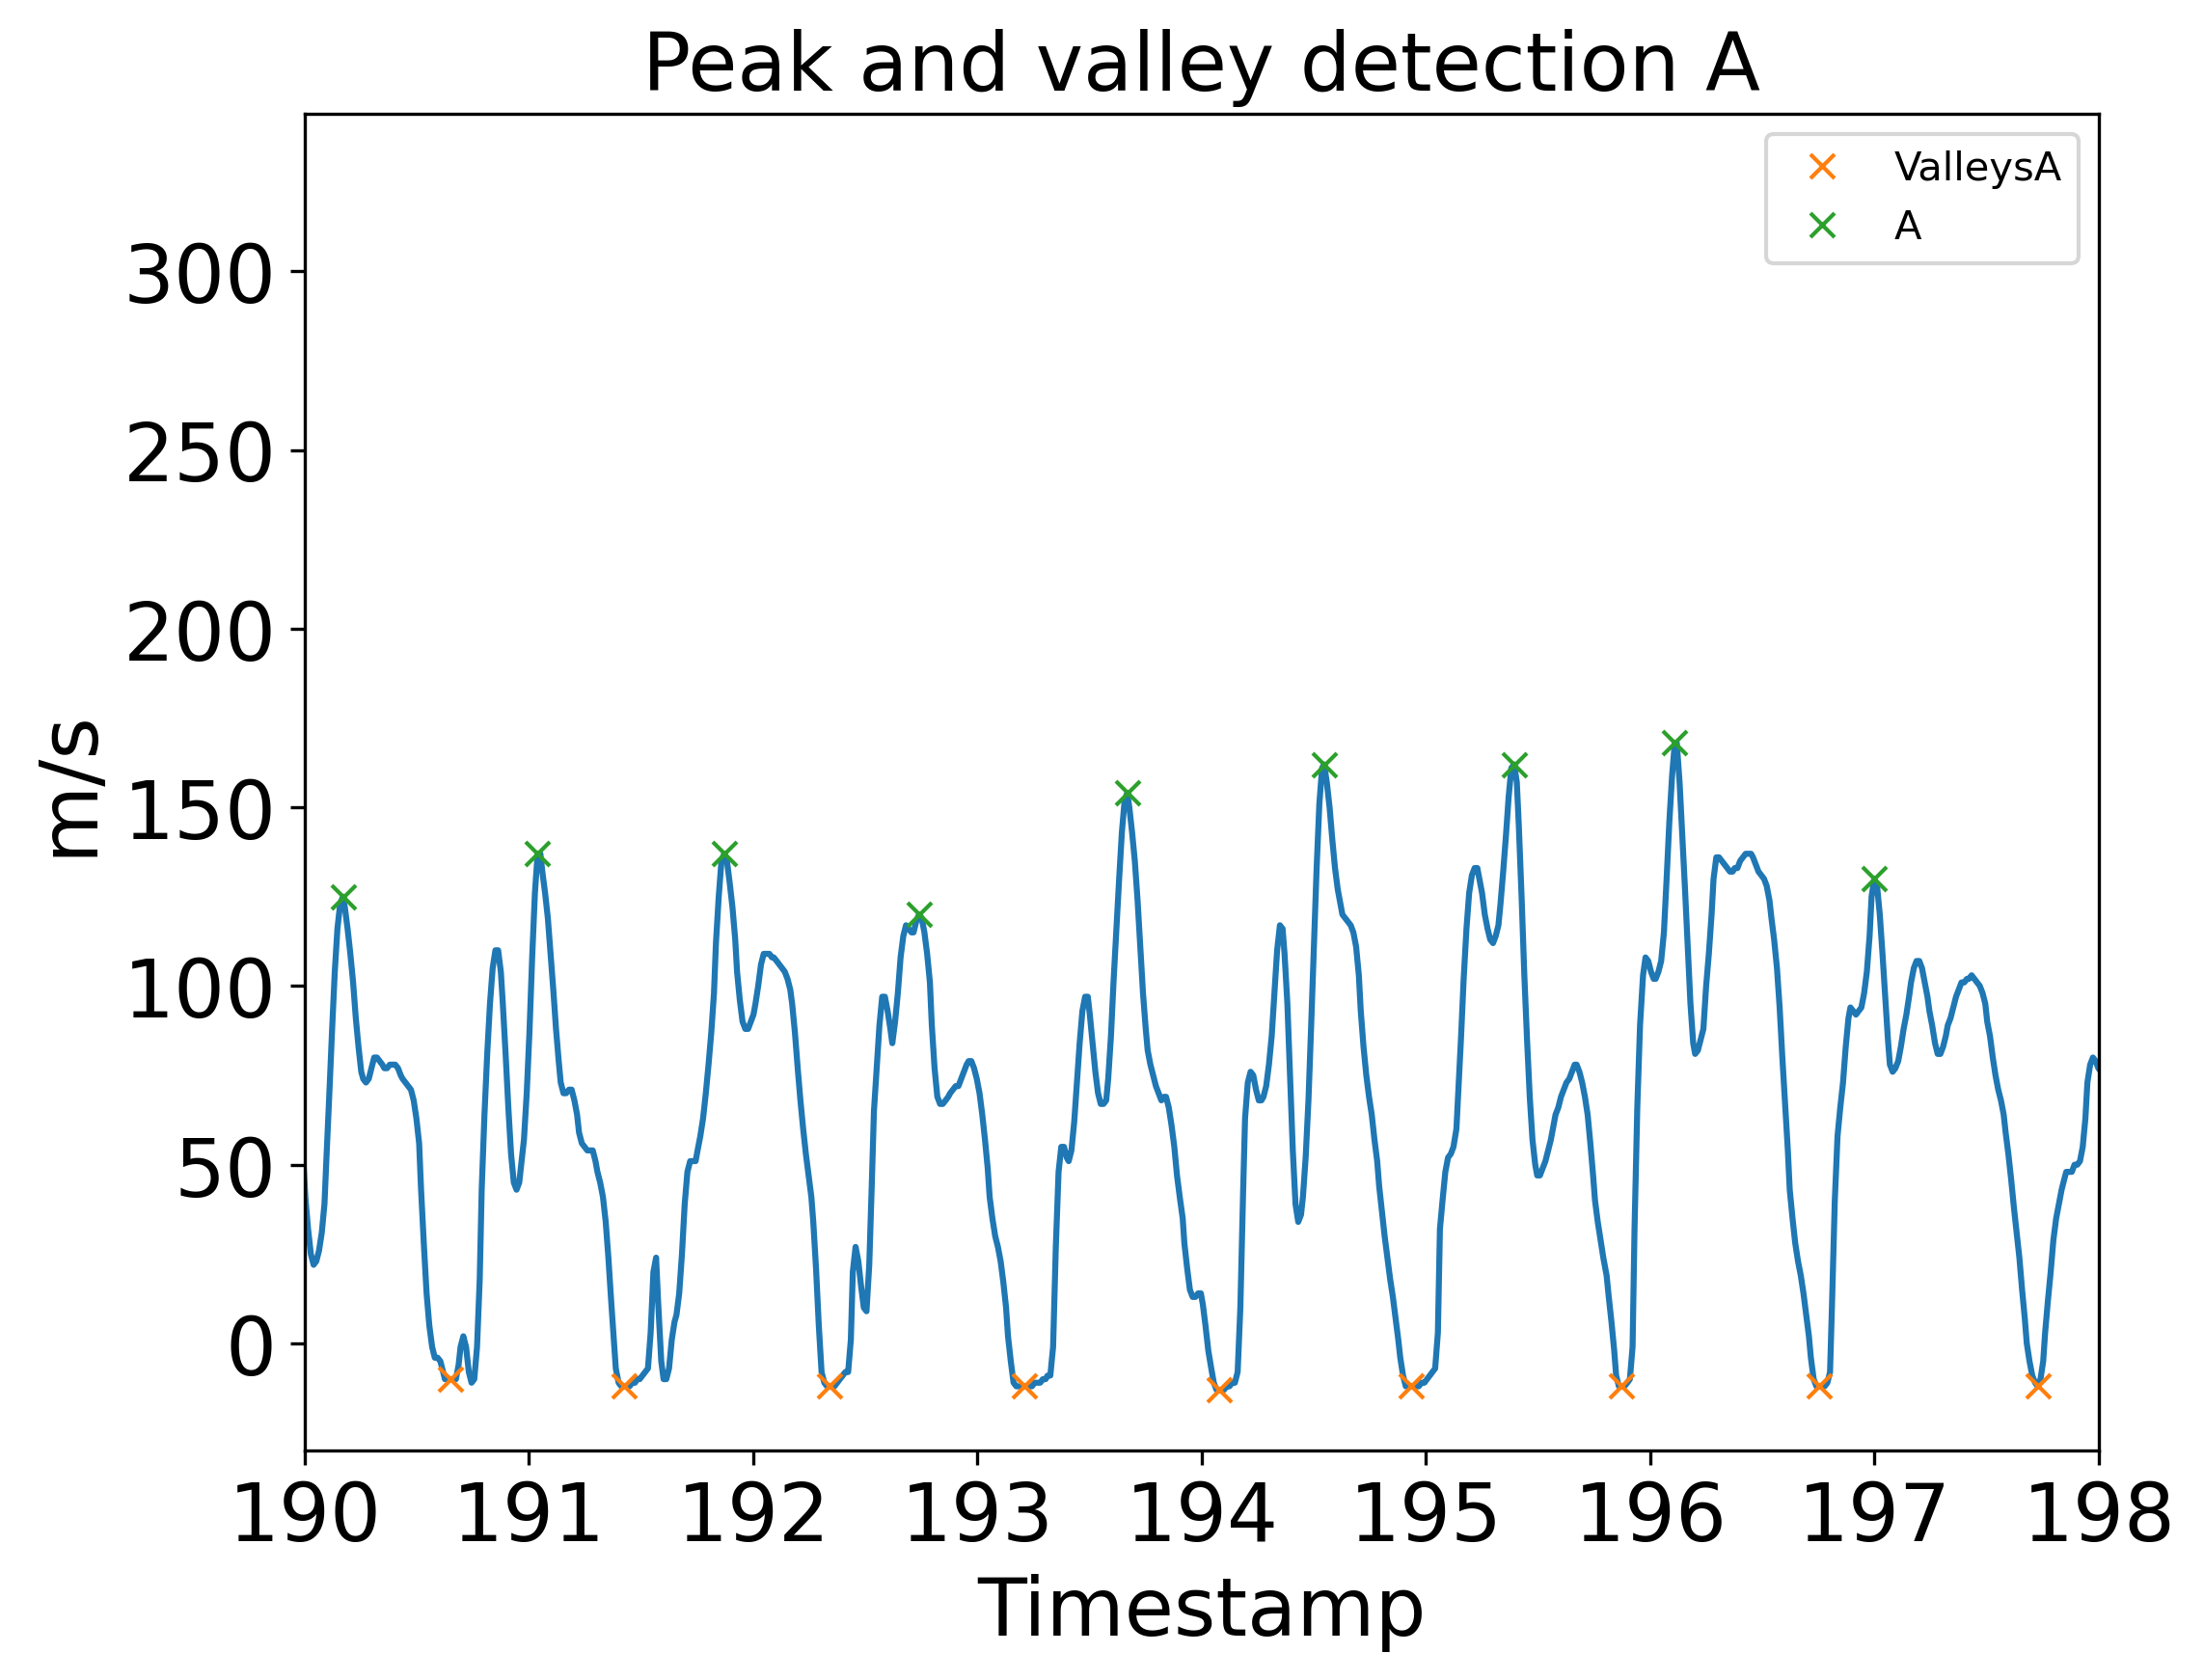

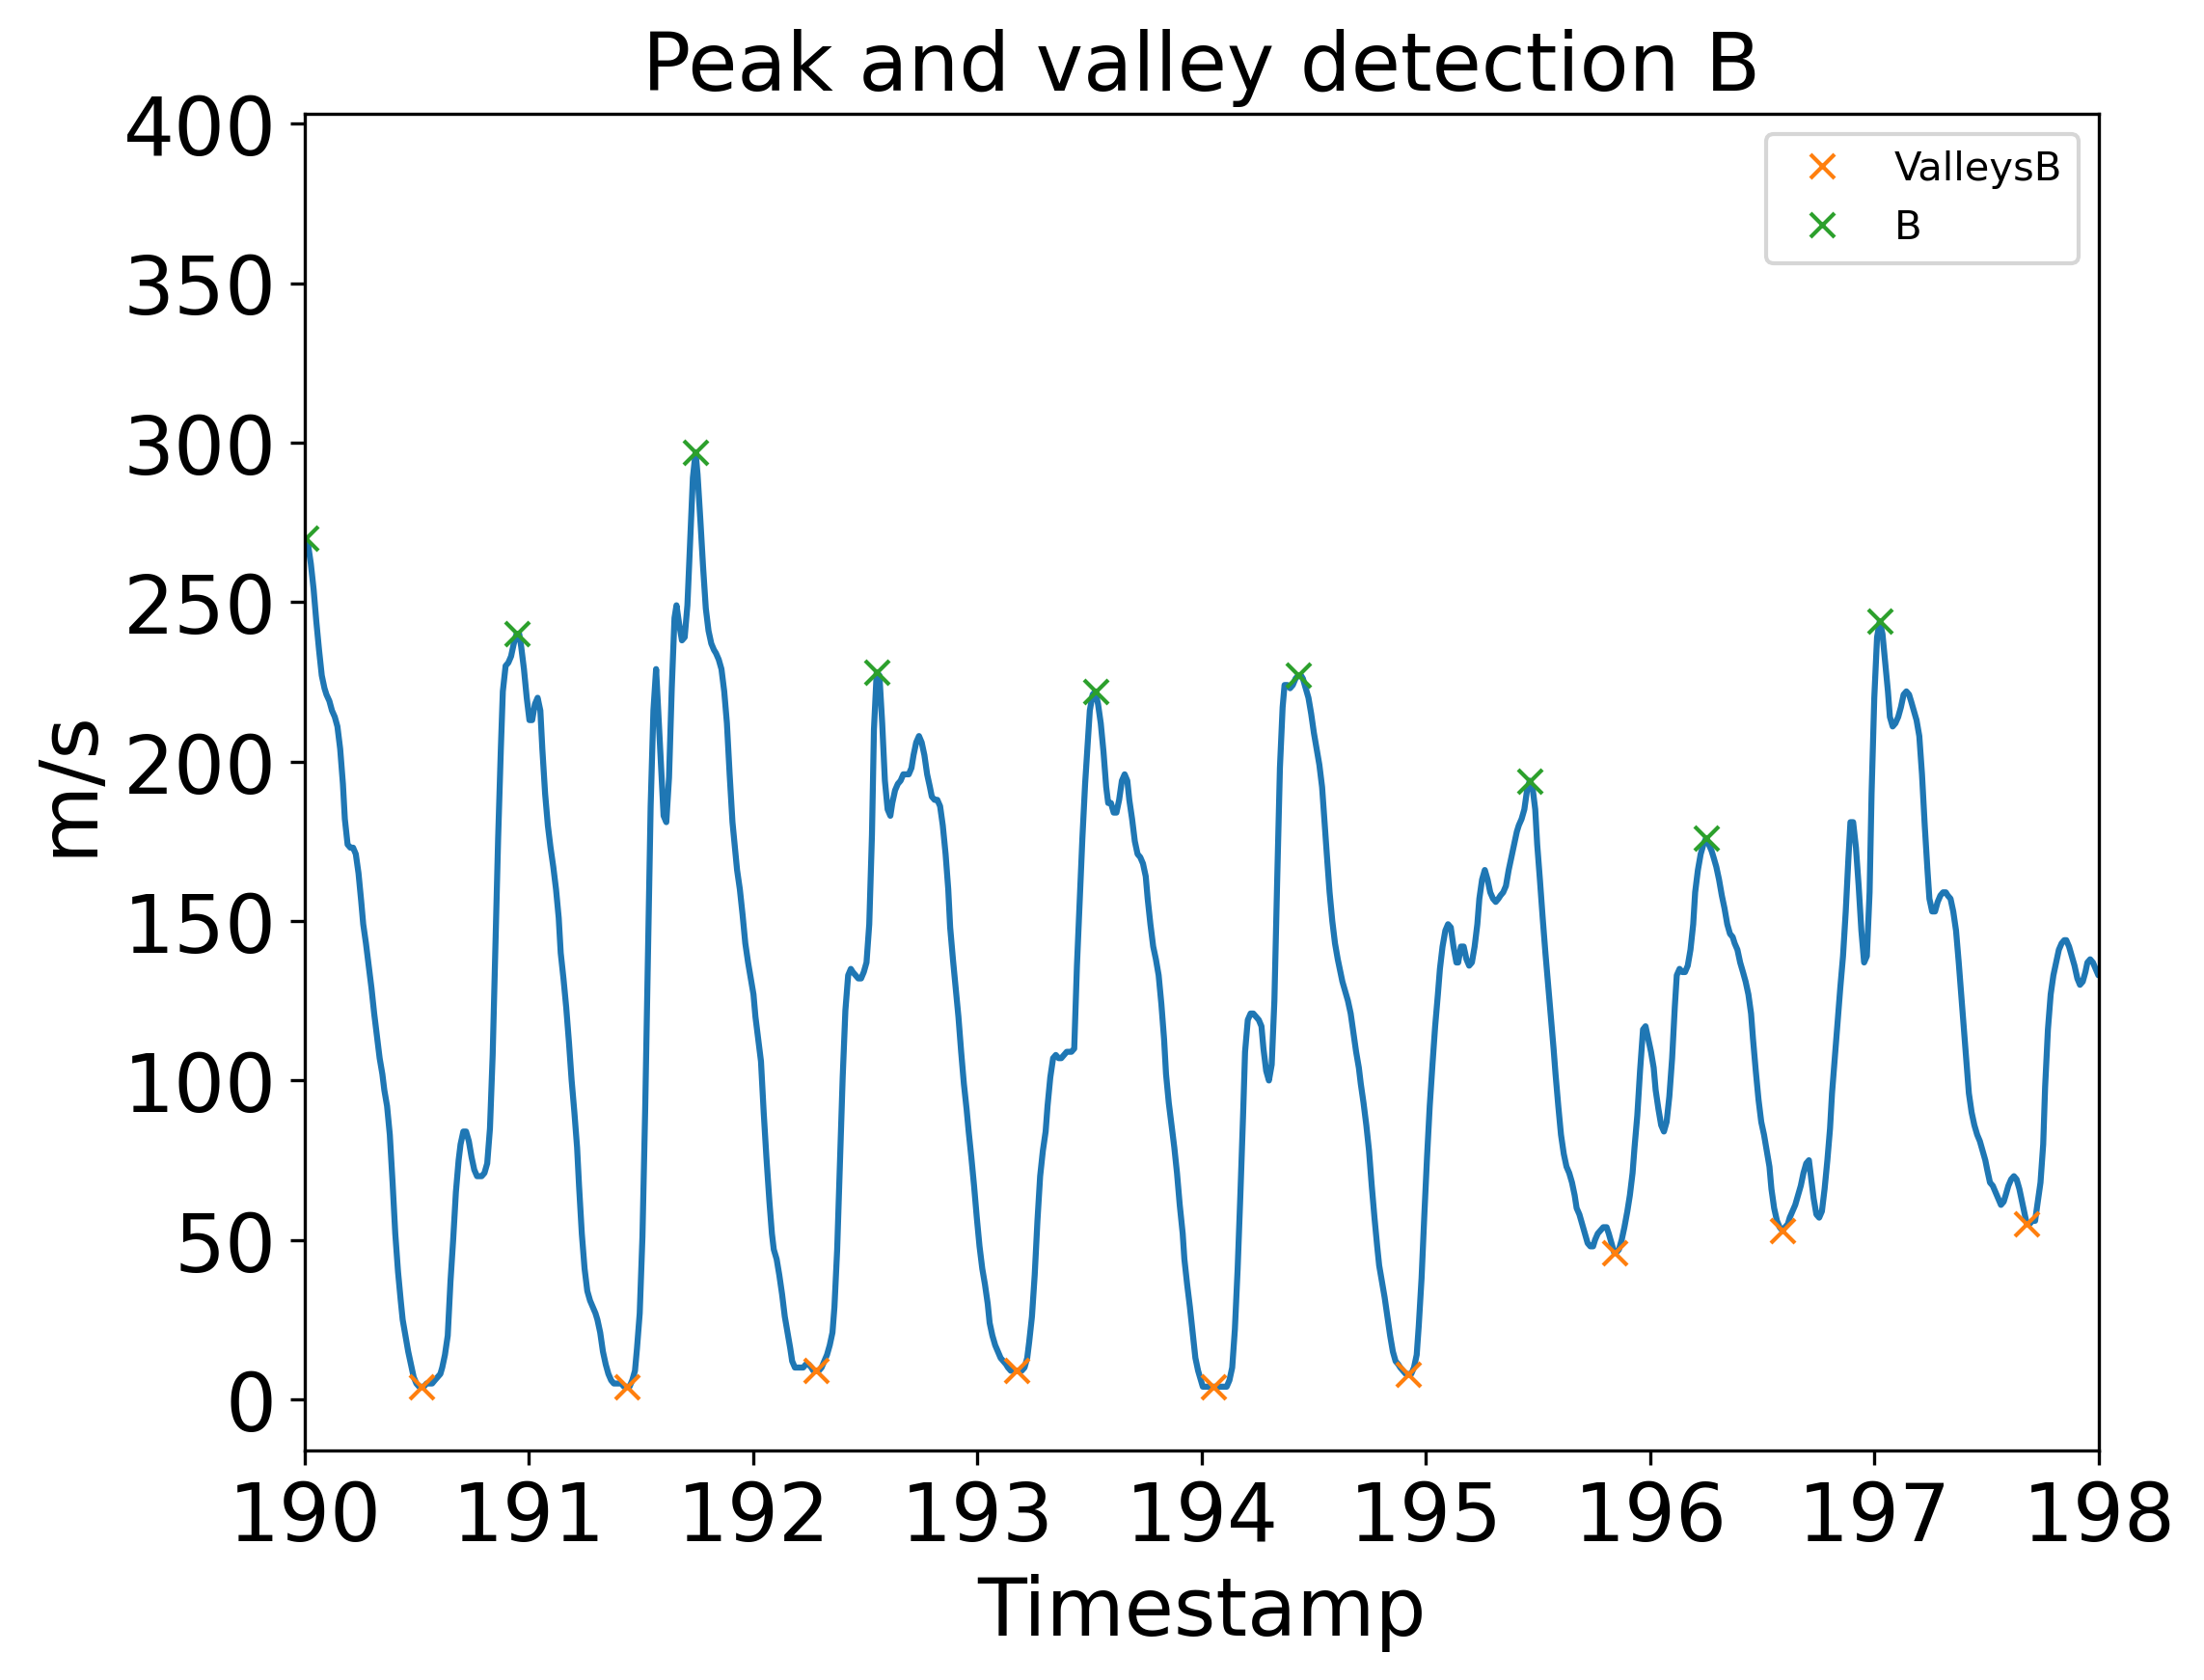

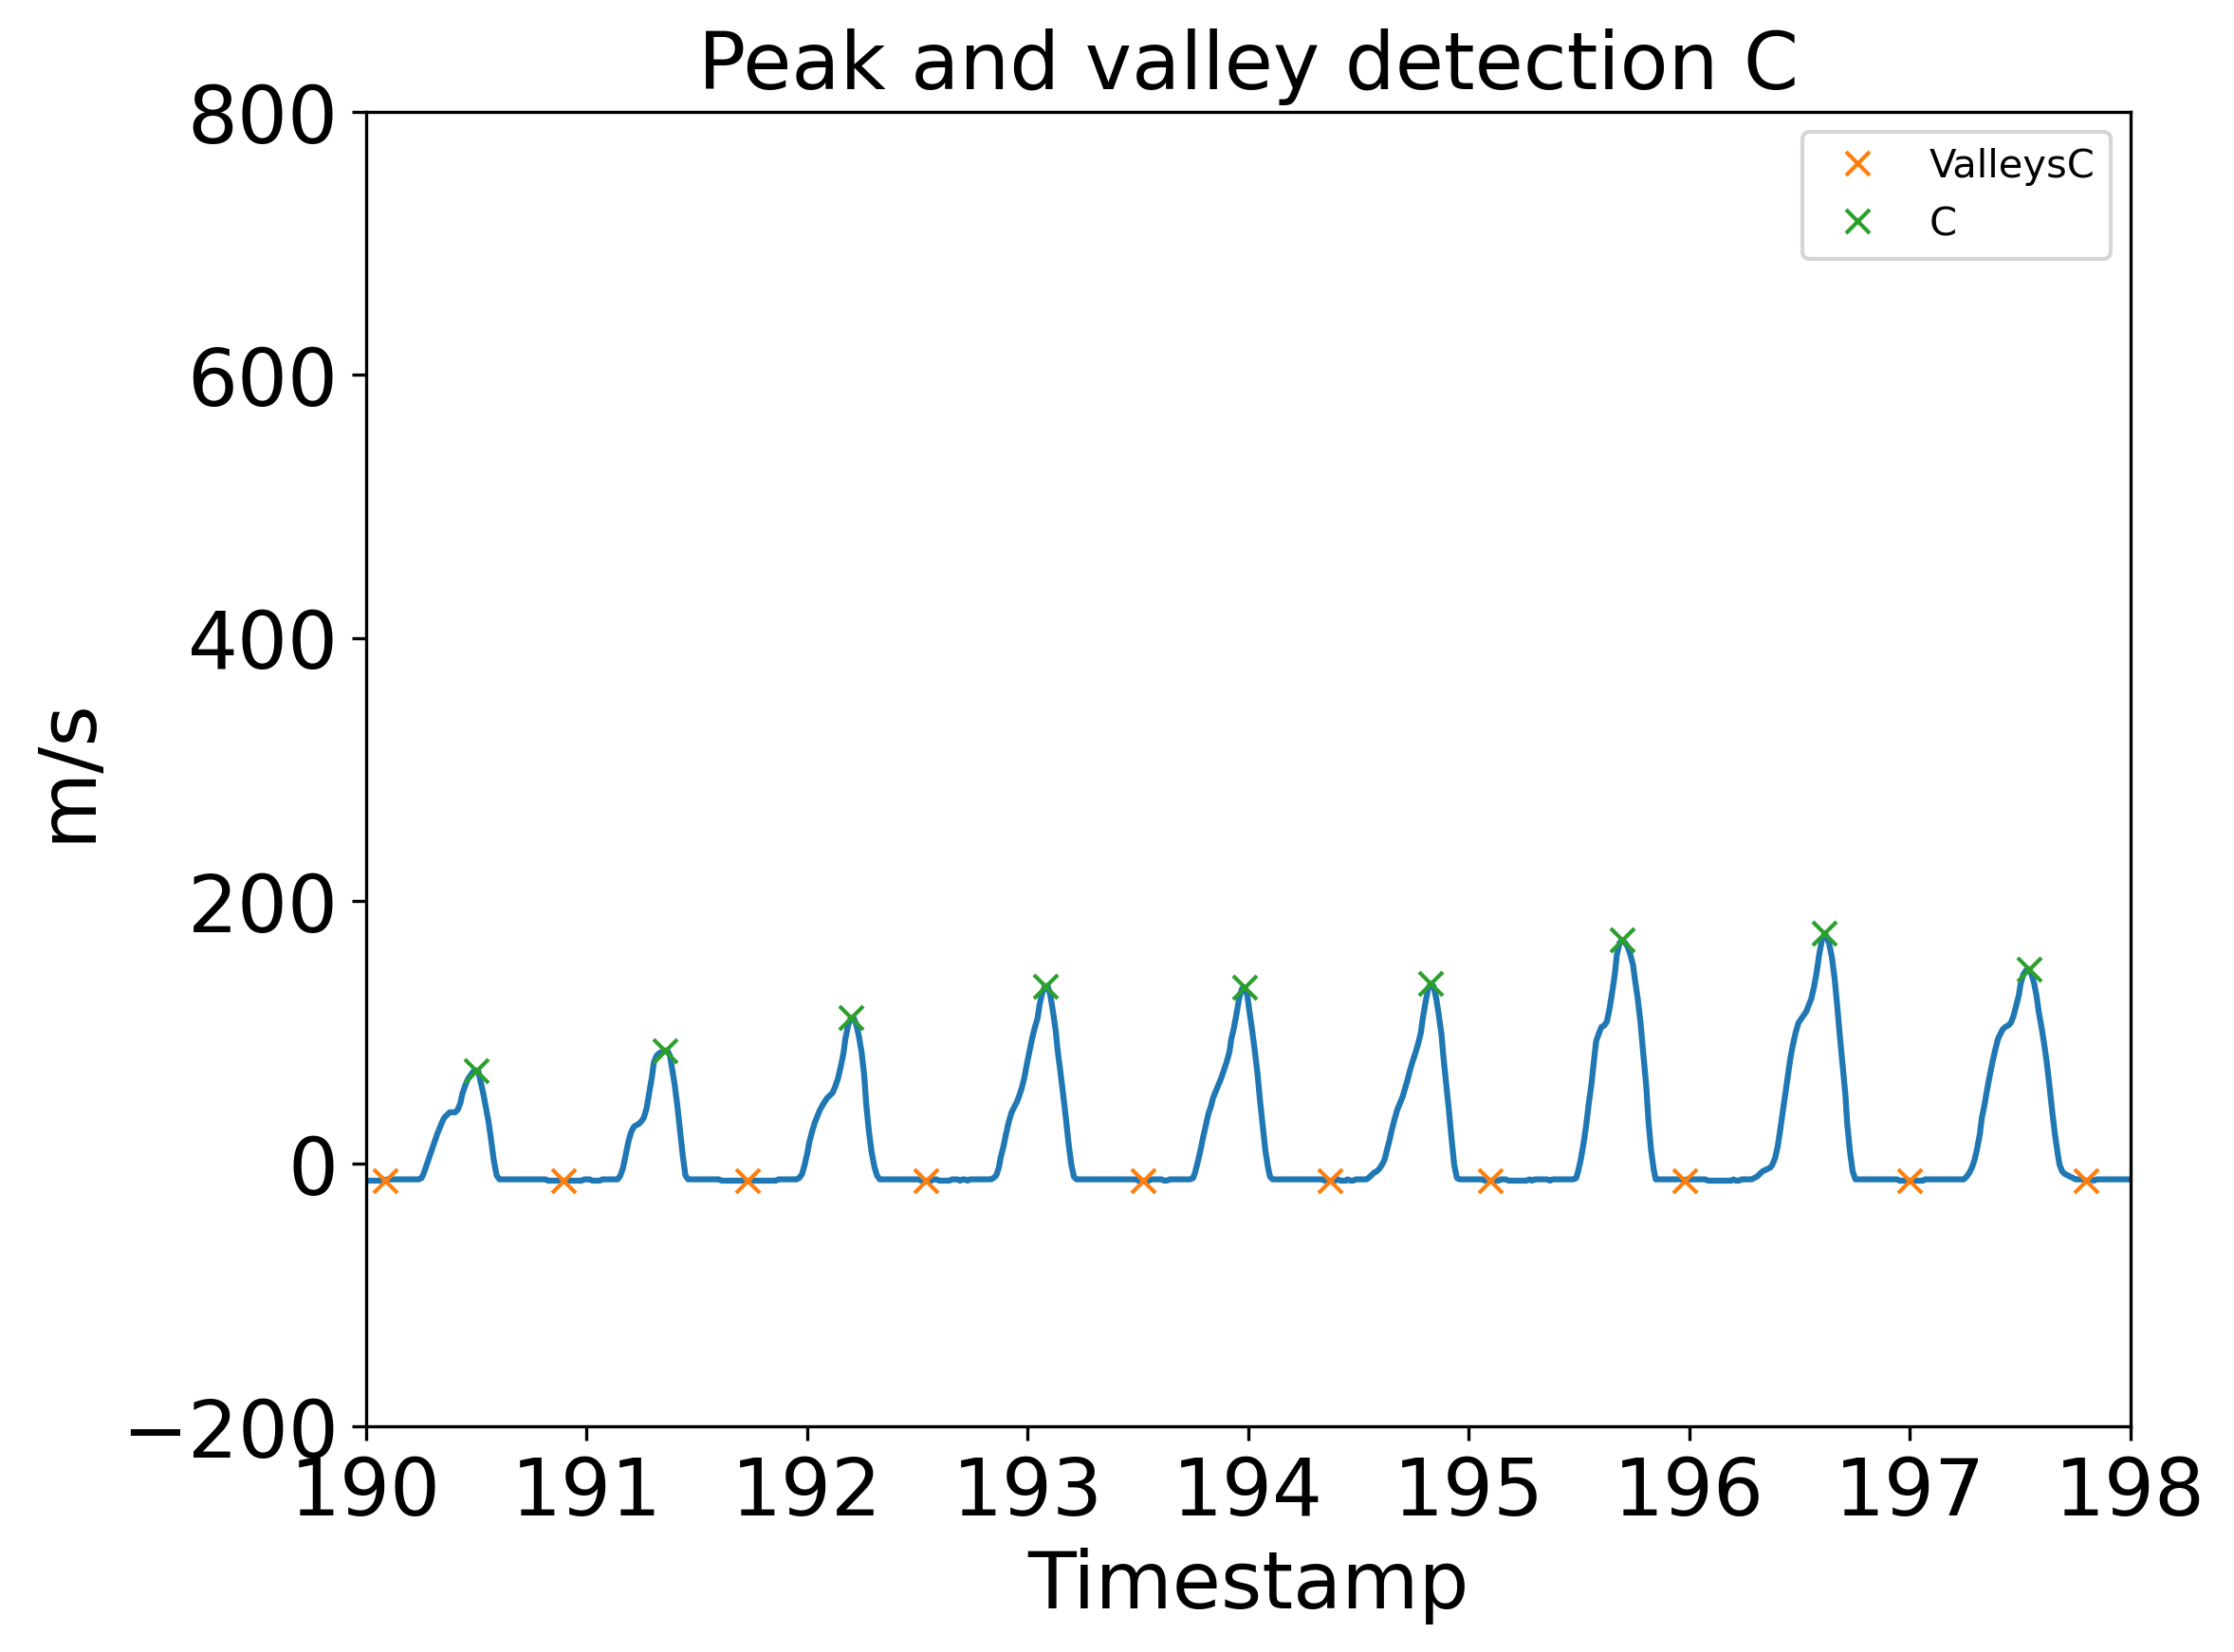

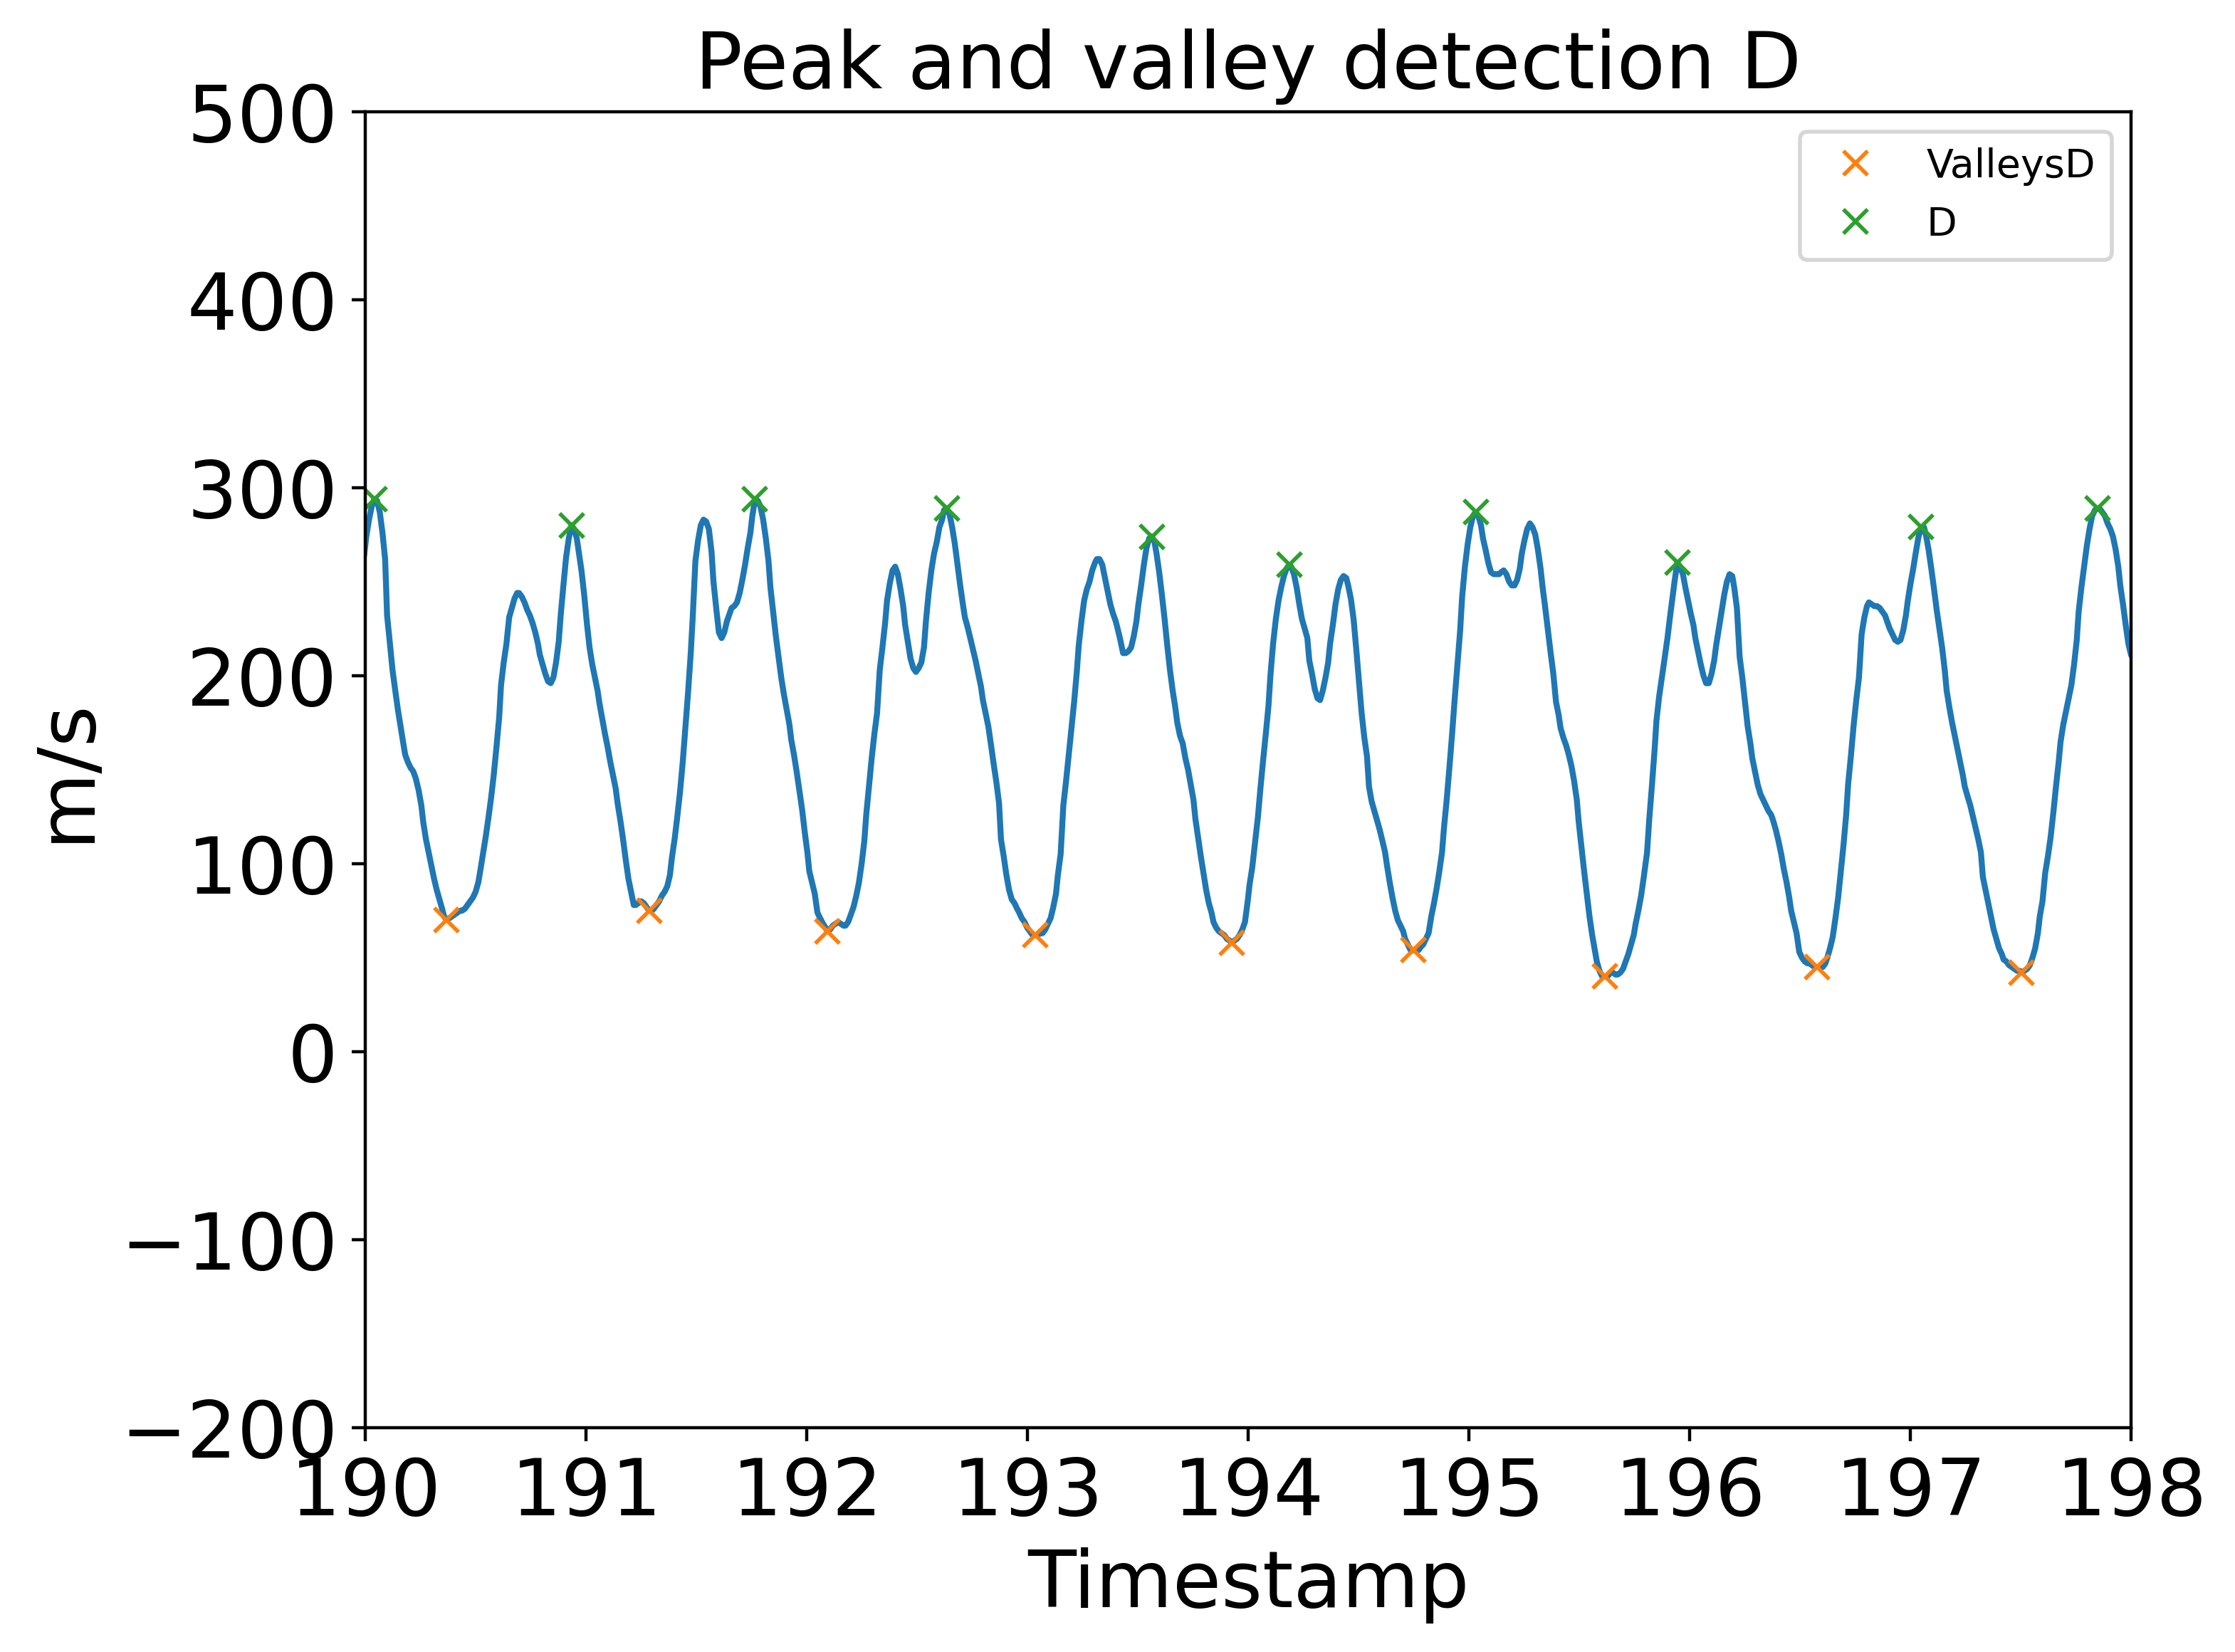

Number of cycles: 8
Number of cycles: 8
Number of cycles: 9
Number of cycles: 8
A - MaxAverage: 169.54545454545453, Standard Deviation: 44.211530364124314
B - MaxAverage: 238.3025641025641, Standard Deviation: 47.230213532742525
C - MaxAverage: 150.91959798994975, Standard Deviation: 101.6709816535237
D - MaxAverage: 208.98095238095237, Standard Deviation: 68.99758186961971
A - MinAverage: 26.722772277227723, Standard Deviation: 42.395735543972805
B - MinAverage: 88.67005076142132, Standard Deviation: 44.3357948739393
C - MinAverage: 8.668341708542714, Standard Deviation: 54.78189328531313
D - MinAverage: 70.63084112149532, Standard Deviation: 29.7583598910401


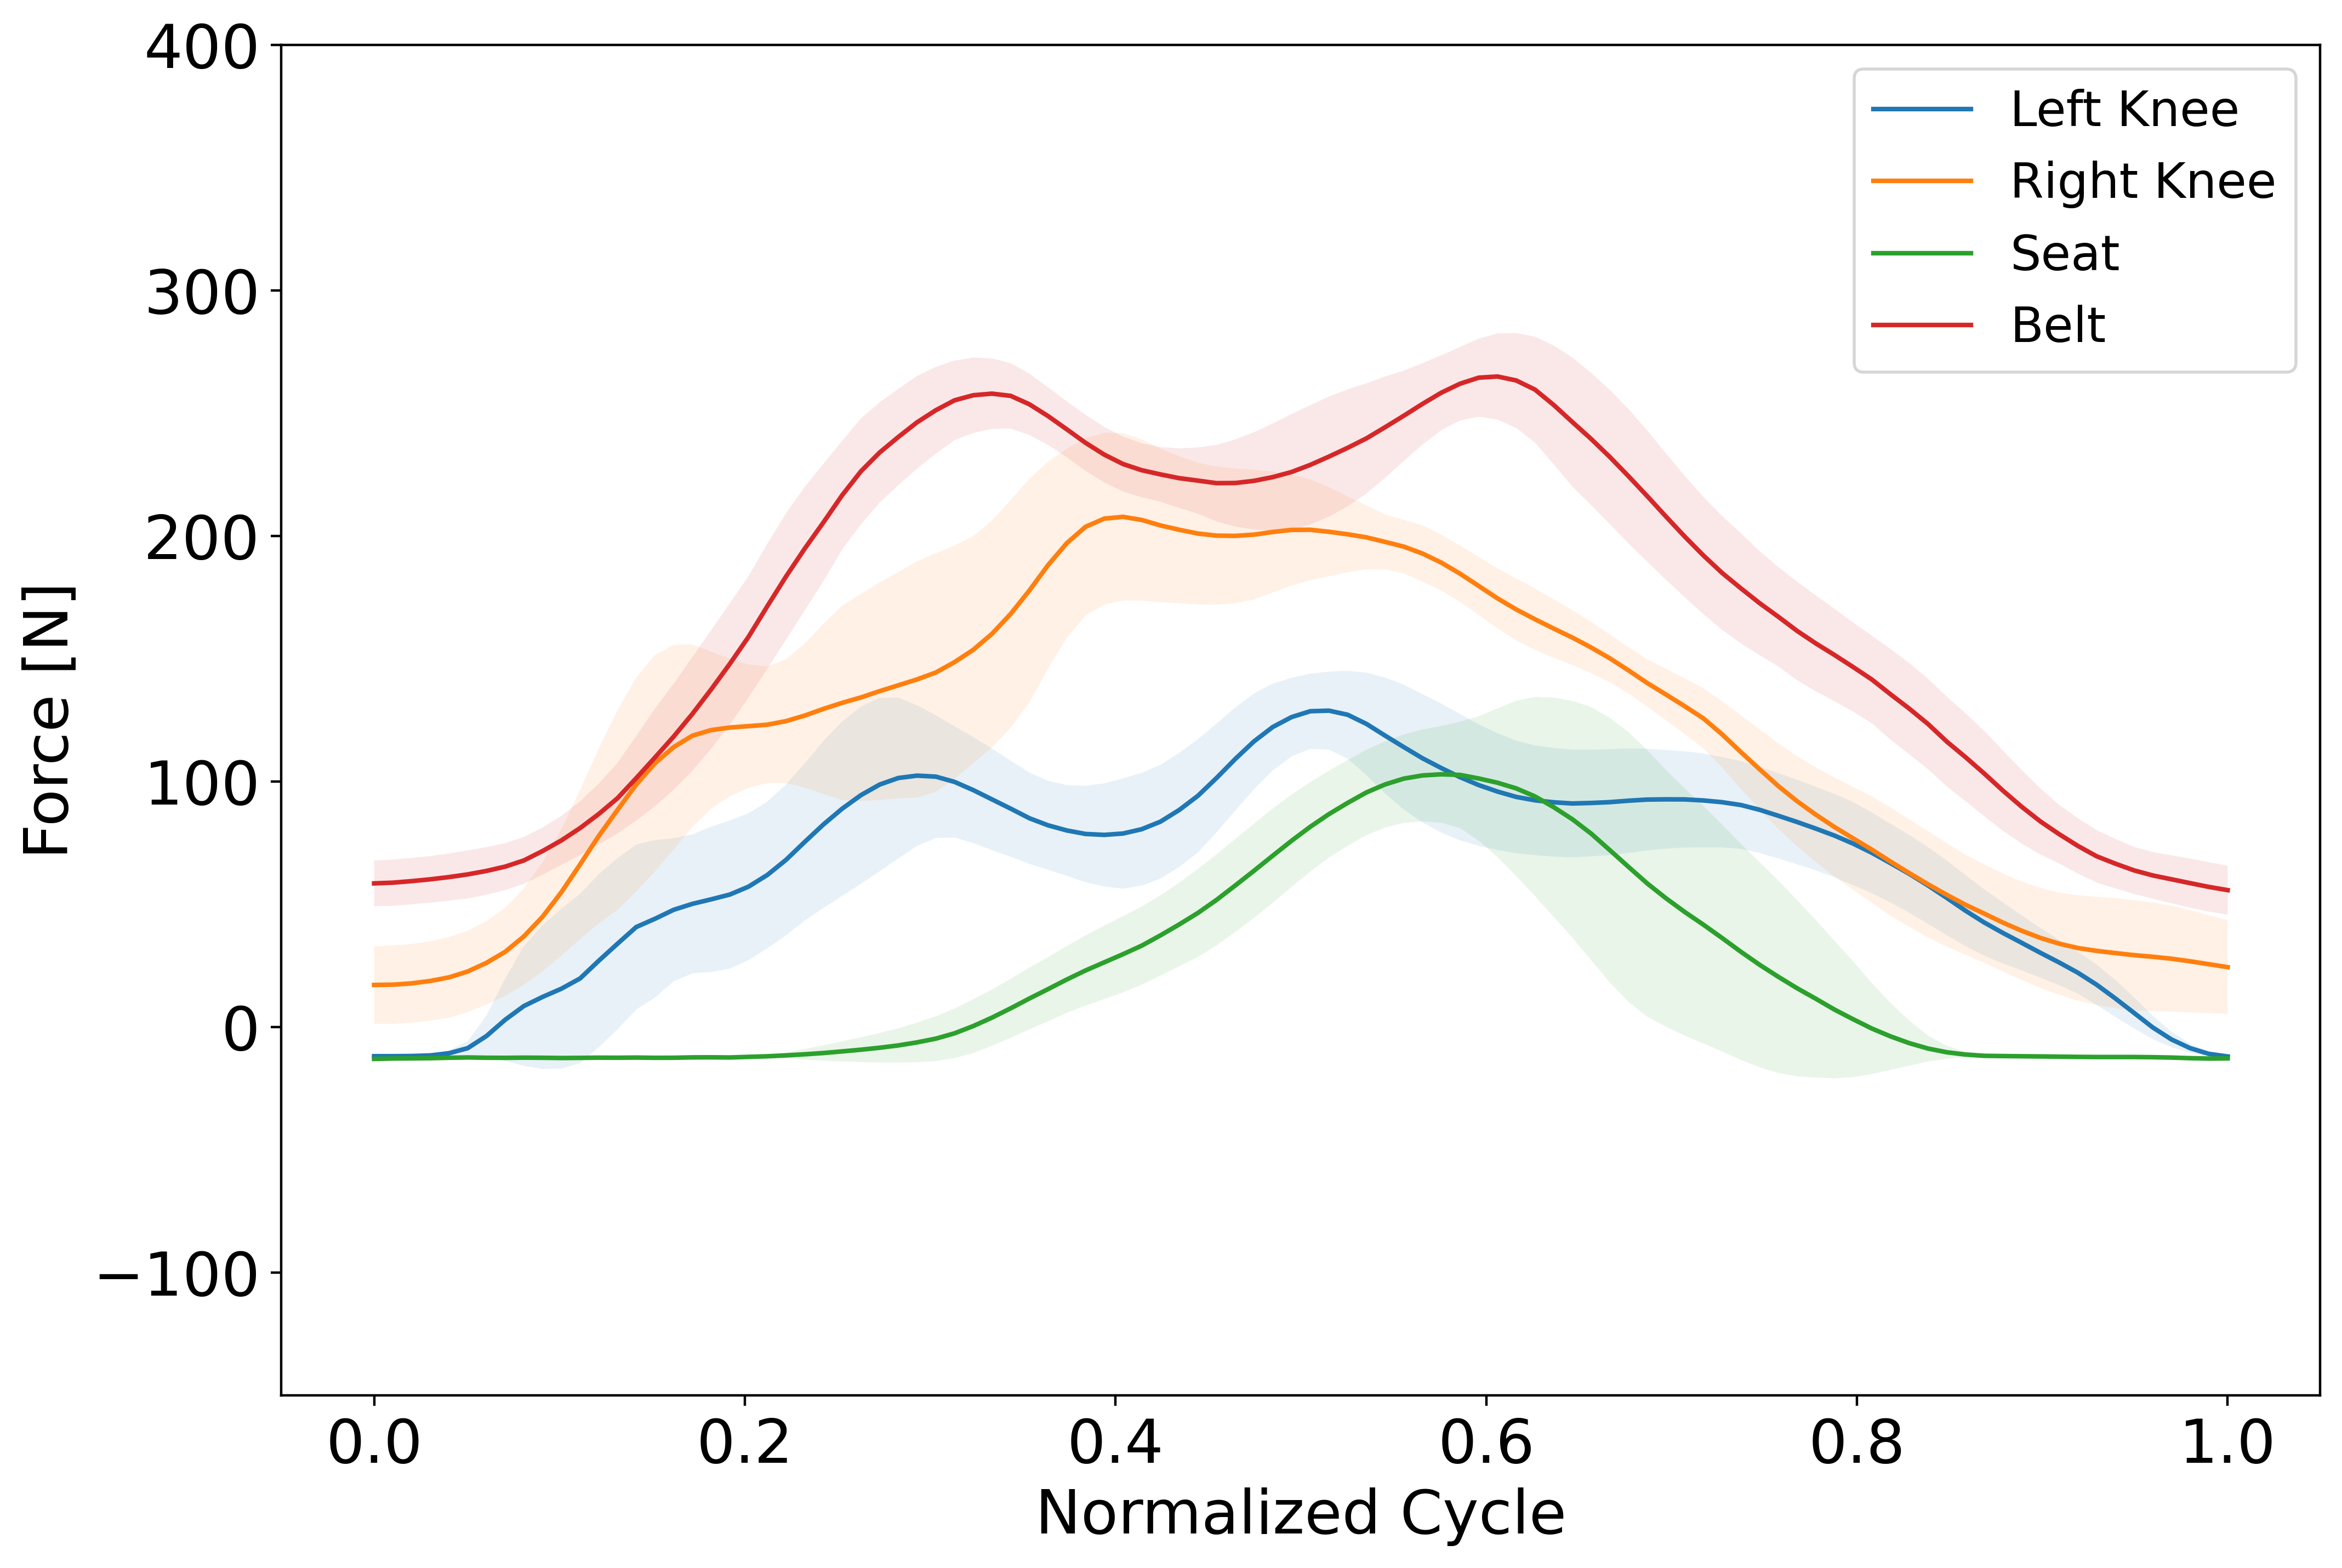

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap
from datetime import datetime
from scipy.stats import t

data1 = pd.read_csv('Petter-C1.csv')
data2 = pd.read_csv('Petter-C1.csv')
data3 = pd.read_csv('Petter-C1.csv')
data4 = pd.read_csv('Petter-C1.csv')

### TIMESTAMPS ###
start1 = 190
end1 = 198

start2 = 190
end2 = 198

start3 = 190
end3 = 198

start4 = 190
end4 = 198

### LEGEND ###
LABELX = "Normalized Cycle"
LABELY = "Force [N]"
#TITLE = "Position C - Uphill"

LABEL1 = "Left Knee"
LABEL2 = "Right Knee"
LABEL3 = "Seat"
LABEL4 = "Belt"

timestampsA = data1.iloc[:, 0].tolist()
valuesA1 = data1.iloc[:, 1].tolist()

timestampsB = data2.iloc[:, 0].tolist()
valuesB1 = data2.iloc[:, 2].tolist()

timestampsC = data3.iloc[:, 0].tolist()
valuesC1 = data3.iloc[:, 3].tolist()

timestampsD = data4.iloc[:, 0].tolist()
valuesD1 = data4.iloc[:, 4].tolist()

first1 = datetime.strptime(timestampsA[0], '%Y-%m-%d %H:%M:%S.%f')
first2 = datetime.strptime(timestampsB[0], '%Y-%m-%d %H:%M:%S.%f')
first3 = datetime.strptime(timestampsC[0], '%Y-%m-%d %H:%M:%S.%f')
first4 = datetime.strptime(timestampsD[0], '%Y-%m-%d %H:%M:%S.%f')

first1_milli = first1.timestamp()
first2_milli = first2.timestamp()
first3_milli = first3.timestamp()
first4_milli = first4.timestamp()

timestamps1_sec = [(datetime.strptime(i, '%Y-%m-%d %H:%M:%S.%f').timestamp() - first1_milli) for i in timestampsA]
timestamps2_sec = [(datetime.strptime(i, '%Y-%m-%d %H:%M:%S.%f').timestamp() - first2_milli) for i in timestampsB]
timestamps3_sec = [(datetime.strptime(i, '%Y-%m-%d %H:%M:%S.%f').timestamp() - first3_milli) for i in timestampsC]
timestamps4_sec = [(datetime.strptime(i, '%Y-%m-%d %H:%M:%S.%f').timestamp() - first4_milli) for i in timestampsD]

timestamps1_sec = np.array(timestamps1_sec)
valuesA1 = np.array(valuesA1)

timestamps2_sec = np.array(timestamps2_sec)
valuesB1 = np.array(valuesB1)

timestamps3_sec = np.array(timestamps3_sec)
valuesC1 = np.array(valuesC1)
valuesC1 = np.add(100, valuesC1)

timestamps4_sec = np.array(timestamps4_sec)
valuesD1 = np.array(valuesD1)
########--------------Data selection -----------------------------------------------------------------------#####
## Astart bakke=
## Bstart bakke=
## Cstart bakke=
## Dstart bakke=

########--------------Valley detection1 AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA -----------------------------------------------------------------------#####

t_tot = (end1 - start1)
mask = (timestamps1_sec >= start1) & (timestamps1_sec <= end1)
print(t_tot)

inverted_values1 = -valuesA1
values1 = valuesA1

prominence_threshold = 1.0
distance_threshold = 60

valley_indices1, _ = find_peaks(inverted_values1, prominence=prominence_threshold, distance=distance_threshold)
indices1, _ = find_peaks(values1, prominence=prominence_threshold, distance=distance_threshold)

valleyAX = timestamps1_sec[valley_indices1]
valleyAY = valuesA1[valley_indices1]
AX = timestamps1_sec[indices1]
AY = valuesA1[indices1]

mask = (timestamps1_sec >= start1) & (timestamps1_sec <= end1)
filtered_t1 = timestamps1_sec[mask]
filtered_A1 = valuesA1[mask]

valley_indices1, _ = find_peaks(-filtered_A1, prominence=prominence_threshold, distance=distance_threshold)
indices1, _ = find_peaks(-filtered_A1, prominence=prominence_threshold, distance=distance_threshold)

########---------BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB-----Valley detection2 -----------------------------------------------------------------------#####


t_tot = (end2 - start2)
mask = (timestamps1_sec >= start2) & (timestamps1_sec <= end2)
print(t_tot)

inverted_values2 = -valuesB1
values2 = valuesB1

prominence_thresholdB = 1.0
distance_thresholdB = 60

valley_indices2, _ = find_peaks(inverted_values2, prominence=prominence_thresholdB, distance=distance_thresholdB)
indices2, _ = find_peaks(values2, prominence=prominence_thresholdB, distance=distance_thresholdB)

valleyBX = timestamps2_sec[valley_indices2]
valleyBY = valuesB1[valley_indices2]
BX = timestamps2_sec[indices2]
BY = valuesB1[indices2]


mask = (timestamps2_sec >= start2) & (timestamps2_sec <= end2)
filtered_t2 = timestamps2_sec[mask]
filtered_B1 = valuesB1[mask]

valley_indices2, _ = find_peaks(-filtered_B1, prominence=prominence_thresholdB, distance=distance_thresholdB)
indices2, _ = find_peaks(-filtered_B1, prominence=prominence_thresholdB, distance=distance_thresholdB)

########----------CCCCCCCCCCCCCCCCCCCCCCCCCCCCCC----Valley detection3 -----------------------------------------------------------------------#####

t_tot = (end3 - start3)
mask = (timestamps1_sec >= start3) & (timestamps1_sec <= end3)
print(t_tot)

inverted_values3 = -valuesC1
values3 = valuesC1

prominence_thresholdC = 1.0
distance_thresholdC = 60


valley_indices3, _ = find_peaks(inverted_values3, prominence=prominence_thresholdC, distance=distance_thresholdC)
indices3, _ = find_peaks(values3, prominence=prominence_thresholdC, distance=distance_thresholdC)

valleyCX = timestamps3_sec[valley_indices3]
valleyCY = valuesC1[valley_indices3]
CX = timestamps3_sec[indices3]
CY = valuesC1[indices3]

mask = (timestamps3_sec >= start3) & (timestamps3_sec <= end3)
filtered_t3 = timestamps3_sec[mask]
filtered_C1 = valuesC1[mask]


valley_indices3, _ = find_peaks(-filtered_C1, prominence=prominence_thresholdC, distance=distance_thresholdC)
indices3, _ = find_peaks(-filtered_C1, prominence=prominence_thresholdC, distance=distance_thresholdC)

########------DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD--------Valley detection4 -----------------------------------------------------------------------#####

t_tot = (end4 - start4)
mask = (timestamps1_sec >= start4) & (timestamps1_sec <= end4)
print(t_tot)

inverted_values4 = -valuesD1
values4 = valuesD1

prominence_thresholdDV = 1.0
distance_thresholdDV = 50

prominence_thresholdD = 1.0
distance_thresholdD = 50

valley_indices4, _ = find_peaks(inverted_values4, prominence=prominence_thresholdDV, distance=distance_thresholdDV)
indices4, _ = find_peaks(values4, prominence=prominence_thresholdD, distance=distance_thresholdD)

valleyDX = timestamps4_sec[valley_indices4]
valleyDY = valuesD1[valley_indices4]
DX = timestamps4_sec[indices4]
DY = valuesD1[indices4]

mask = (timestamps4_sec >= start4) & (timestamps4_sec <= end4)
filtered_t4 = timestamps4_sec[mask]
filtered_D1 = valuesD1[mask]


valley_indices4, _ = find_peaks(-filtered_D1, prominence=prominence_thresholdD, distance=distance_thresholdD)
indices4, _ = find_peaks(-filtered_D1, prominence=prominence_thresholdD, distance=distance_thresholdD)


########             PLOT 2 Valley detection Speed              ####################

plt.figure(figsize=(8, 6), dpi=300)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Peak and valley detection A", fontsize=20)
plt.xlabel("Timestamp", fontsize=20)
plt.ylabel("m/s", fontsize=20)
plt.xlim([start1, end1])
plt.plot(timestamps1_sec, valuesA1)
plt.plot(valleyAX, valleyAY, "x", label="ValleysA")
plt.plot(AX, AY, "x", label="A")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6), dpi=300)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Peak and valley detection B", fontsize=20)
plt.xlabel("Timestamp", fontsize=20)
plt.ylabel("m/s", fontsize=20)
plt.xlim([start2, end2])
plt.plot(timestamps2_sec, valuesB1)
plt.plot(valleyBX, valleyBY, "x", label="ValleysB")
plt.plot(BX, BY, "x", label="B")
plt.legend()
plt.show()


plt.figure(figsize=(8, 6), dpi=300)
plt.ylim([-200, 800])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Peak and valley detection C", fontsize=20)
plt.xlabel("Timestamp", fontsize=20)
plt.ylabel("m/s", fontsize=20)
plt.xlim([start3, end3])
plt.plot(timestamps3_sec, valuesC1)
plt.plot(valleyCX, valleyCY, "x", label="ValleysC")
plt.plot(CX, CY, "x", label="C")
plt.legend()
plt.show()


plt.figure(figsize=(8, 6), dpi=400)
plt.ylim([-200, 500])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Peak and valley detection D", fontsize=20)
plt.xlabel("Timestamp", fontsize=20)
plt.ylabel("m/s", fontsize=20)
plt.xlim([start4, end4])
plt.plot(timestamps4_sec, valuesD1)
plt.plot(valleyDX, valleyDY, "x", label="ValleysD")
plt.plot(DX, DY, "x", label="D")
plt.legend()
plt.show()

########             PLOT 4 interpolated Cycles with deviations from peaks              ####################

def combine_cycles(speed_data, valley_indices, resampled_length=100):
    combined_cycles = []
    for i in range(len(valley_indices) - 1):
        start_idx = valley_indices[i]
        end_idx = valley_indices[i + 1]
        cycle_data = speed_data[start_idx:end_idx]
        original_time = np.linspace(0, 1, len(cycle_data))
        normalized_time = np.linspace(0, 1, resampled_length)
        
        # Interpolate the cycle data to the resampled length
        interp_func = interp1d(original_time, cycle_data, kind='linear', fill_value='extrapolate')
        resampled_cycle_data = interp_func(normalized_time)
        
        combined_cycles.append((normalized_time, resampled_cycle_data))
    return combined_cycles

# Use the new combine_cycles function
combined_cycles1 = combine_cycles(filtered_A1, valley_indices1)
combined_cycles2 = combine_cycles(filtered_B1, valley_indices2)
combined_cycles3 = combine_cycles(filtered_C1, valley_indices3)
combined_cycles4 = combine_cycles(filtered_D1, valley_indices4)

def calculate_cycle_stats(combined_cycles):
    cycle_lengths = [len(cycle_data) for _, cycle_data in combined_cycles]
    max_cycle_length = max(cycle_lengths)
    
    speed_sum = np.zeros(max_cycle_length)
    speed_square_sum = np.zeros(max_cycle_length)
    count = np.zeros(max_cycle_length)
    
    for normalized_time, cycle_data in combined_cycles:
        for i, speed in enumerate(cycle_data):
            speed_sum[i] += speed
            speed_square_sum[i] += speed**2
            count[i] += 1
            
    avg_speed = speed_sum / count
    std_dev_speed = np.sqrt((speed_square_sum / count) - (avg_speed**2))
    num_cycles = len(combined_cycles)
    
    return avg_speed, std_dev_speed, num_cycles

avg_speed1, std_dev_speed1, num_cycles1 = calculate_cycle_stats(combined_cycles1)
avg_speed2, std_dev_speed2, num_cycles2 = calculate_cycle_stats(combined_cycles2)
avg_speed3, std_dev_speed3, num_cycles3 = calculate_cycle_stats(combined_cycles3)
avg_speed4, std_dev_speed4, num_cycles4 = calculate_cycle_stats(combined_cycles4)

print(f"Number of cycles: {num_cycles1}")
print(f"Number of cycles: {num_cycles2}")
print(f"Number of cycles: {num_cycles3}")
print(f"Number of cycles: {num_cycles4}")

print(f"A - MaxAverage: {np.mean(AY)}, Standard Deviation: {np.std(AY)}")
print(f"B - MaxAverage: {np.mean(BY)}, Standard Deviation: {np.std(BY)}")
print(f"C - MaxAverage: {np.mean(CY)}, Standard Deviation: {np.std(CY)}")
print(f"D - MaxAverage: {np.mean(DY)}, Standard Deviation: {np.std(DY)}")

print(f"A - MinAverage: {np.mean(valleyAY)}, Standard Deviation: {np.std(valleyAY)}")
print(f"B - MinAverage: {np.mean(valleyBY)}, Standard Deviation: {np.std(valleyBY)}")
print(f"C - MinAverage: {np.mean(valleyCY)}, Standard Deviation: {np.std(valleyCY)}")
print(f"D - MinAverage: {np.mean(valleyDY)}, Standard Deviation: {np.std(valleyDY)}")

def calculate_cycle_stats(combined_cycles):
    cycle_lengths = [len(cycle_data) for _, cycle_data in combined_cycles]
    max_cycle_length = max(cycle_lengths)
    
    speed_sum = np.zeros(max_cycle_length)
    speed_square_sum = np.zeros(max_cycle_length)
    count = np.zeros(max_cycle_length)
    
    for normalized_time, cycle_data in combined_cycles:
        for i, speed in enumerate(cycle_data):
            speed_sum[i] += speed
            speed_square_sum[i] += speed**2
            count[i] += 1
            
    avg_speed = speed_sum / count
    var_speed = (speed_square_sum / count) - (avg_speed**2)
    num_cycles = len(combined_cycles)

    # Calculate the 95% confidence interval
    conf_int_lower = avg_speed - t.ppf(0.975, count - 1) * np.sqrt(var_speed / count)
    conf_int_upper = avg_speed + t.ppf(0.975, count - 1) * np.sqrt(var_speed / count)

    return avg_speed, conf_int_lower, conf_int_upper, num_cycles

avg_speed1, conf_int_lower1, conf_int_upper1, num_cycles1 = calculate_cycle_stats(combined_cycles1)
avg_speed2, conf_int_lower2, conf_int_upper2, num_cycles2 = calculate_cycle_stats(combined_cycles2)
avg_speed3, conf_int_lower3, conf_int_upper3, num_cycles3 = calculate_cycle_stats(combined_cycles3)
avg_speed4, conf_int_lower4, conf_int_upper4, num_cycles4 = calculate_cycle_stats(combined_cycles4)

normalized_time1 = np.linspace(0, 1, len(avg_speed1))
normalized_time2 = np.linspace(0, 1, len(avg_speed2))
normalized_time3 = np.linspace(0, 1, len(avg_speed3))
normalized_time4 = np.linspace(0, 1, len(avg_speed4))

plt.figure(figsize=(12, 8), dpi=400)
plt.xlabel(LABELX, fontsize=20)
plt.ylabel(LABELY, fontsize=20)
#plt.title(TITLE, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim([-150, 400])

normalized_time1 = np.linspace(0, 1, len(avg_speed1))
normalized_time2 = np.linspace(0, 1, len(avg_speed2))
normalized_time3 = np.linspace(0, 1, len(avg_speed3))
normalized_time4 = np.linspace(0, 1, len(avg_speed4))

plt.plot(normalized_time1, avg_speed1, label=LABEL1)
plt.fill_between(normalized_time1, conf_int_lower1, conf_int_upper1, alpha=0.1)

plt.plot(normalized_time2, avg_speed2, label=LABEL2)
plt.fill_between(normalized_time2, conf_int_lower2, conf_int_upper2, alpha=0.1)

plt.plot(normalized_time3, avg_speed3, label=LABEL3)
plt.fill_between(normalized_time3, conf_int_lower3, conf_int_upper3, alpha=0.1)

plt.plot(normalized_time4, avg_speed4, label=LABEL4)
plt.fill_between(normalized_time4, conf_int_lower4, conf_int_upper4, alpha=0.1)

plt.legend(fontsize="16", loc ="upper right")
plt.show()




